In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
train = pd.read_csv("F:\SAROJ WORLD\ADDITIONAL COURSES\Verzeo Internship\minor project/train.csv")
test = pd.read_csv("F:\SAROJ WORLD\ADDITIONAL COURSES\Verzeo Internship\minor project/test.csv")
data = train.append(test,sort=False)
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


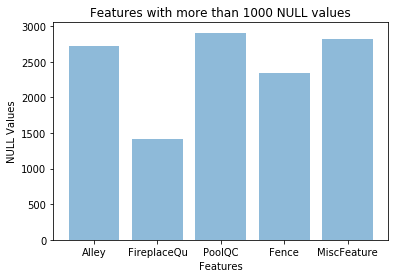

In [4]:
features = []
nullValues = []
for i in data:
    if (data.isna().sum()[i])>1000 and i!='SalePrice':
        features.append(i)
        nullValues.append(data.isna().sum()[i])
y_pos = np.arange(len(features)) 
plt.bar(y_pos, nullValues, align='center', alpha=0.5)
plt.xticks(y_pos, features)
plt.ylabel('NULL Values')
plt.xlabel('Features')
plt.title('Features with more than 1000 NULL values')
plt.show()

In [6]:
data = data.dropna(axis=1, how='any', thresh = 1000)
data = data.fillna(data.mean())
data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,1,0,0,0,0,1,0


In [7]:
data = pd.get_dummies(data)

In [10]:
covarianceMatrix = data.corr()
listOfFeatures = [i for i in covarianceMatrix]
setOfDroppedFeatures = set() 
for i in range(len(listOfFeatures)) :
    for j in range(i+1,len(listOfFeatures)):
        feature1=listOfFeatures[i]
        feature2=listOfFeatures[j]
        if abs(covarianceMatrix[feature1][feature2]) > 0.8:
            setOfDroppedFeatures.add(feature1) 
data = data.drop(setOfDroppedFeatures, axis=1)

In [11]:
nonCorrelatedWithOutput = [column for column in data if abs(data[column].corr(data["SalePrice"])) < 0.045]
data = data.drop(nonCorrelatedWithOutput, axis=1)

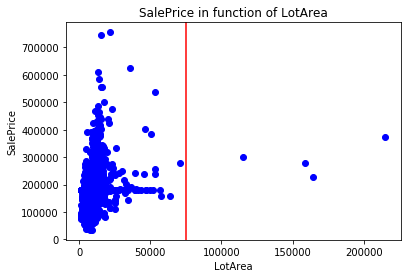

In [12]:
plt.plot(data['LotArea'], data['SalePrice'], 'bo')
plt.axvline(x=75000, color='r')
plt.ylabel('SalePrice')
plt.xlabel('LotArea')
plt.title('SalePrice in function of LotArea')
plt.show()



In [13]:
newTrain = data.iloc[:1460]
newTest = data.iloc[1460:]
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))
trainWithoutOutliers = newTrain
for column in newTrain:
    outlierValuesList = np.ndarray.tolist(outliers_iqr(newTrain[column])[0])
    trainWithoutOutliers = newTrain.drop(outlierValuesList)
trainWithoutOutliers = newTrain

In [14]:
X = trainWithoutOutliers.drop("SalePrice", axis=1)
Y = np.log1p(trainWithoutOutliers["SalePrice"])
reg = LinearRegression().fit(X, Y)

In [15]:
newTest = newTest.drop("SalePrice", axis=1) #Remove SalePrice column
pred = np.expm1(reg.predict(newTest))
sub = pd.DataFrame()
sub['Id'] = test['Id']
sub['SalePrice'] = pred
sub.to_csv("submission.csv", index=False)
sub

,Id,SalePrice
0,1461,125543.536704
1,1462,159697.813889
2,1463,185433.617412
3,1464,206407.175524
4,1465,195747.037729
...,...,...
1454,2915,83883.150259
1455,2916,86542.720735
1456,2917,175501.168476
1457,2918,114899.562987
